In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#PREPROCESSING

df = pd.read_csv("Global YouTube Statistics.csv", encoding="latin-1")

df.replace(['nan', '', 'NAN', 'NaN'], np.nan, inplace=True)

df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

numeric_cols = [
    'subscribers', 'video_views', 'uploads', 'video_views_rank', 'country_rank', 'channel_type_rank',
    'video_views_for_the_last_30_days', 'lowest_monthly_earnings', 'highest_monthly_earnings',
    'lowest_yearly_earnings', 'highest_yearly_earnings', 'subscribers_for_last_30_days',
    'Gross_tertiary_education_enrollment_(%)', 'Population', 'Unemployment_rate', 'Urban_population',
    'Latitude', 'Longitude'
]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')



In [5]:
#1. What are the top 10 YouTube channels based on the number of subscribers?
ans1 = df.head(10)[['youtuber', 'subscribers']]
print(ans1)

                     youtuber  subscribers
0                    T-Series  245000000.0
1              YouTube Movies  170000000.0
2                     MrBeast  166000000.0
3  Cocomelon - Nursery Rhymes  162000000.0
4                   SET India  159000000.0
5                       Music  119000000.0
6         ýýý Kids Diana Show  112000000.0
7                   PewDiePie  111000000.0
8                 Like Nastya  106000000.0
9               Vlad and Niki   98900000.0


In [6]:
#2. Which category has the highest average number of subscribers?
ans = df.groupby('category')['subscribers'].mean().sort_values(ascending=False)
print(ans.head(1))

category
Shows    4.161538e+07
Name: subscribers, dtype: float64


category
Autos & Vehicles           1550.666667
Comedy                     1202.557143
Education                  3087.086957
Entertainment             12052.445378
Film & Animation           2861.844444
Gaming                     4285.273684
Howto & Style              1695.500000
Movies                     3553.000000
Music                      2325.945813
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
People & Blogs             9256.793893
Pets & Animals             3562.800000
Science & Technology       2114.058824
Shows                     27443.692308
Sports                    19129.833333
Trailers                   6839.000000
Travel & Events             766.000000
Name: uploads, dtype: float64


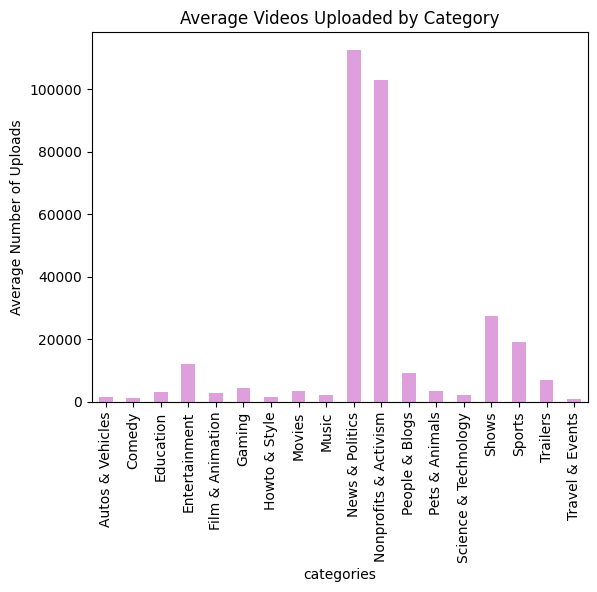

In [7]:
#3. How many videos, on average, are uploaded by YouTube channels in each category?
num_vids_avg = df.groupby('category')['uploads'].mean()
print(num_vids_avg)

num_vids_avg.plot.bar(color='plum')
plt.title("Average Videos Uploaded by Category")
plt.xlabel("categories")
plt.ylabel("Average Number of Uploads")
plt.show()



In [8]:
#4. What are the top 5 countries with the highest number of YouTube channels?
top_5_countries = df.groupby('country')['youtuber'].count().sort_values(ascending=False).head(5)
print(top_5_countries)

country
United States     315
India             169
Brazil             62
United Kingdom     44
Mexico             33
Name: youtuber, dtype: int64


Distribution of channel types across different categories

 channel_type           Animals  Autos  Comedy  Education  Entertainment  Film  \
category                                                                        
Autos & Vehicles             0      2       0          0              1     0   
Comedy                       0      0      39          0             20     1   
Education                    0      0       0         36              3     2   
Entertainment                0      1       5          2            168     6   
Film & Animation             0      0       1          2             16    17   
Gaming                       0      1       1          0             18     2   
Howto & Style                0      0       0          0              7     0   
Movies                       0      0       0          0              0     2   
Music                        0      0       0          1             12     5   
News & Politics              0      0       0    

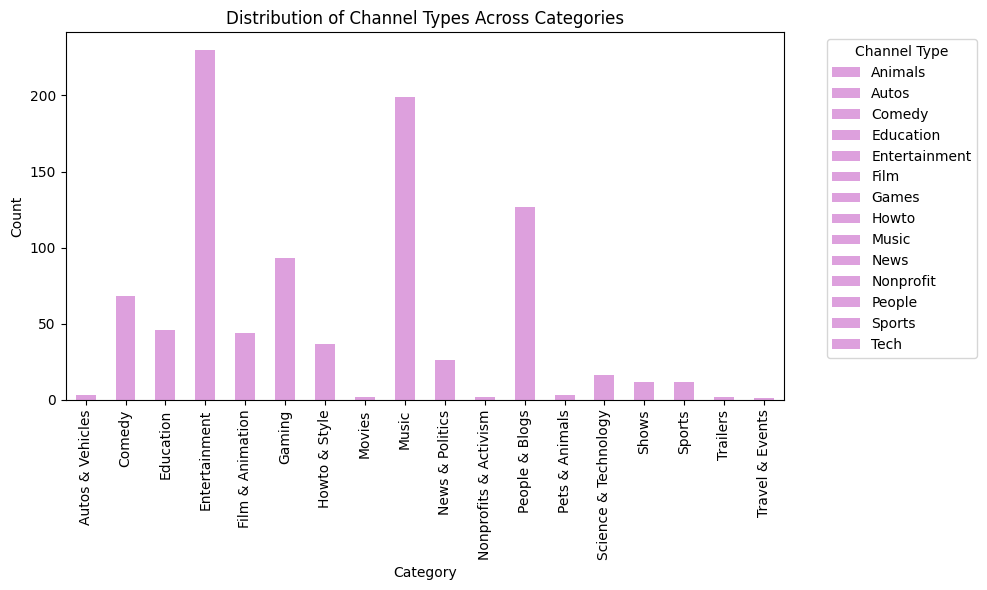

In [9]:
#5. What is the distribution of channel types across different categories?
channel_dist = pd.crosstab(df['category'], df['channel_type'])
print("Distribution of channel types across different categories\n\n",  channel_dist)
channel_dist.plot(kind='bar', stacked=True, figsize=(10, 6), color='plum')
plt.title('Distribution of Channel Types Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Channel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [10]:
#6. Is there a correlation between the number of subscribers and total video views for YouTube channels?
sub_view = df.groupby(['category'])['youtuber'].count().sort_values(ascending=False)
print(sub_view)
output = df["subscribers"].corr(df['video_views'])
print("\n\ncorrelation between the number of subscribers and total video views for YouTube channels: ", output)

category
Entertainment            238
Music                    203
People & Blogs           131
Gaming                    95
Comedy                    70
Education                 46
Film & Animation          45
Howto & Style             40
News & Politics           26
Science & Technology      17
Shows                     13
Sports                    12
Pets & Animals             5
Autos & Vehicles           3
Movies                     2
Nonprofits & Activism      2
Trailers                   2
Travel & Events            1
Name: youtuber, dtype: int64


correlation between the number of subscribers and total video views for YouTube channels:  0.7481786016237689


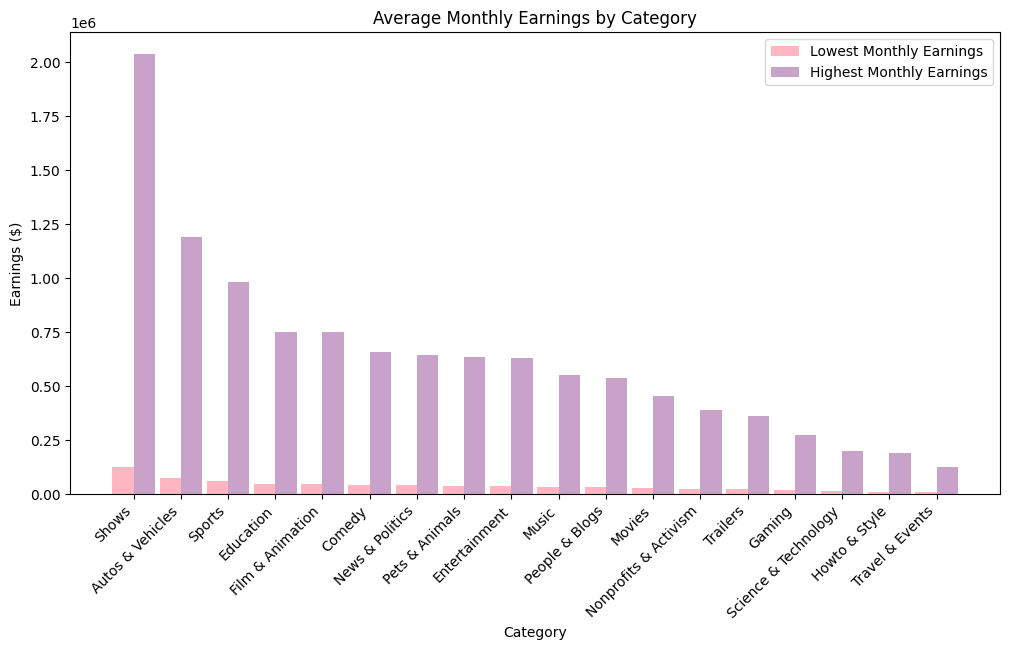

In [11]:
#7. How do the monthly earnings vary throughout different categories?

monthly_earnings = df.groupby("category")[["lowest_monthly_earnings", "highest_monthly_earnings"]].mean().sort_values("lowest_monthly_earnings", ascending=False)

categories = monthly_earnings.index
lowest = monthly_earnings["lowest_monthly_earnings"]
highest = monthly_earnings["highest_monthly_earnings"]

x = np.arange(len(categories))
width = 0.45

plt.figure(figsize=(12,6))
plt.bar(x - width/2, lowest, width, label='Lowest Monthly Earnings', color='#FFB6C1')
plt.bar(x + width/2, highest, width, label='Highest Monthly Earnings', color='#C8A2C8')

plt.ylabel('Earnings ($)')
plt.xlabel('Category')
plt.title('Average Monthly Earnings by Category')
plt.xticks(x, categories, rotation=45, ha='right')
plt.legend()
plt.show()



Average subscribers gained in the last 30 days across all channels: 349541.85285285284


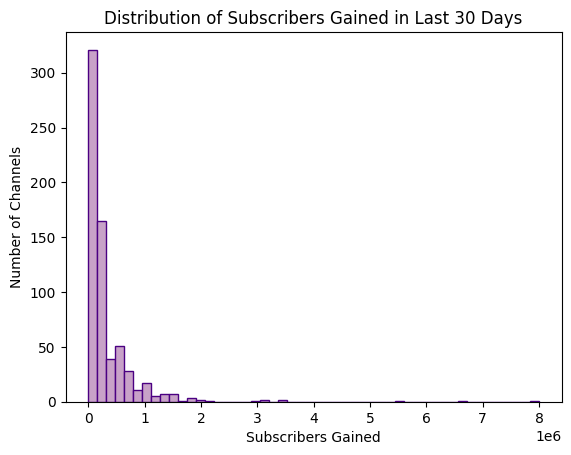

In [12]:
#8. What is the overall trend in subscribers gained in the last 30 days across all channels?
subs_30_days = df['subscribers_for_last_30_days']
overall_avg = subs_30_days.mean()
print("Average subscribers gained in the last 30 days across all channels:", overall_avg)

plt.hist(subs_30_days, bins=50, color='#C8A2C8', edgecolor='#4B0082')
plt.title('Distribution of Subscribers Gained in Last 30 Days')
plt.xlabel('Subscribers Gained')
plt.ylabel('Number of Channels')
plt.show()


In [13]:
#9. Are there any outliers in terms of yearly earnings from YouTube channels?

q1 = df['highest_yearly_earnings'].quantile(0.25)
q3 = df['highest_yearly_earnings'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

high_outliers = df[df['highest_yearly_earnings'] > upper_bound][['youtuber', 'highest_yearly_earnings']]
print("Outliers with unusually high earnings:\n", high_outliers)

low_outliers = df[df['highest_yearly_earnings'] < lower_bound][['youtuber', 'highest_yearly_earnings']]
print("Outliers with unusually low earnings:\n", low_outliers)


Outliers with unusually high earnings:
                        youtuber  highest_yearly_earnings
0                      T-Series              108400000.0
2                       MrBeast               64700000.0
3    Cocomelon - Nursery Rhymes               94800000.0
4                     SET India               87500000.0
6           ýýý Kids Diana Show               35100000.0
..                          ...                      ...
908                 Susy Mouriz               17700000.0
970                    _vector_               43400000.0
990               Natan por Aï¿               26500000.0
995                         WWE               34300000.0
999           Infobells - Hindi               39200000.0

[101 rows x 2 columns]
Outliers with unusually low earnings:
 Empty DataFrame
Columns: [youtuber, highest_yearly_earnings]
Index: []


Channels created by year:
 created_year
1970.0      1
2005.0     24
2006.0     93
2007.0     52
2008.0     46
2009.0     52
2010.0     48
2011.0     82
2012.0     68
2013.0     78
2014.0    100
2015.0     73
2016.0     78
2017.0     68
2018.0     46
2019.0     34
2020.0     30
2021.0     23
2022.0      5
Name: count, dtype: int64


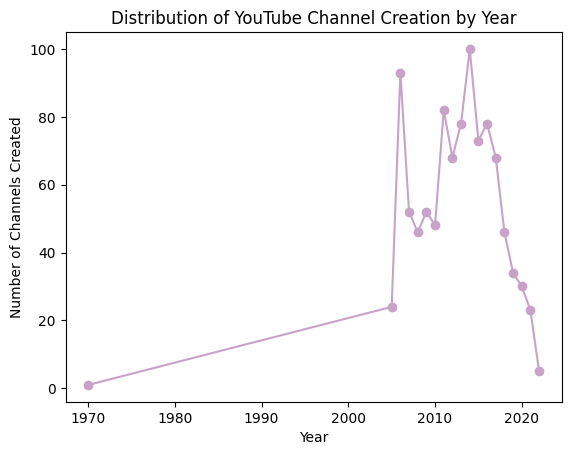

In [14]:
#10. What is the distribution of channel creation dates? Is there any trend over time?
creation_trend = df['created_year'].value_counts().sort_index(ascending=True)
print("Channels created by year:\n", creation_trend)

plt.plot(creation_trend.index, creation_trend.values, marker='o', color='#C8A2C8')
plt.title("Distribution of YouTube Channel Creation by Year")
plt.xlabel("Year")
plt.ylabel("Number of Channels Created")
plt.show()

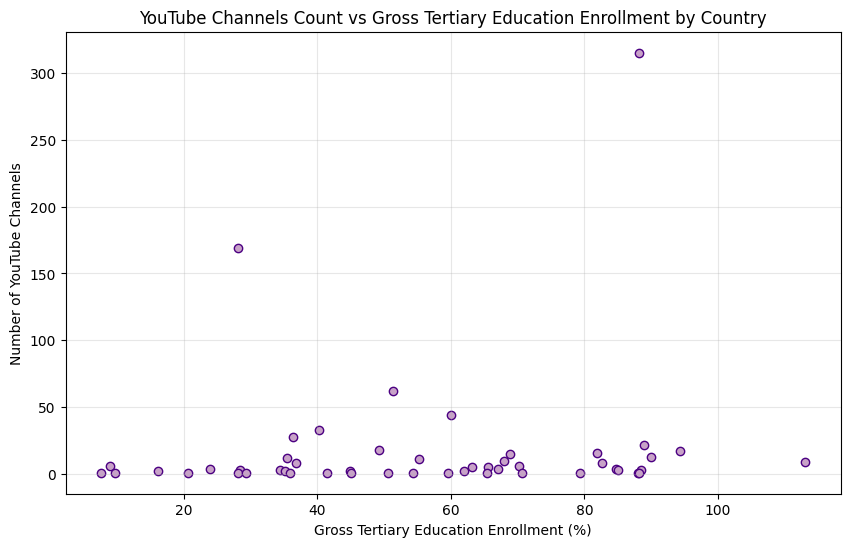

In [15]:
#11. Is there a relationship between gross tertiary education enrollment and the number of YouTube channels in a country?
channels_per_country = df['country'].value_counts()
edu_per_country = df.groupby('country')['gross_tertiary_education_enrollment_(%)'].mean()

combined_df = pd.concat([channels_per_country, edu_per_country], axis=1).dropna()
combined_df.columns = ['channel_count', 'education_enrollment']

plt.figure(figsize=(10,6))
plt.scatter(combined_df['education_enrollment'], combined_df['channel_count'], color='#C8A2C8', edgecolor='#4B0082')
plt.title('YouTube Channels Count vs Gross Tertiary Education Enrollment by Country')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Number of YouTube Channels')
plt.grid(alpha=0.3)
plt.show()

Top 10 countries with highest number of YouTube channels:
 country
United States     315
India             169
Brazil             62
United Kingdom     44
Mexico             33
Indonesia          28
Spain              22
Thailand           18
South Korea        17
Russia             16
Name: count, dtype: int64

Unemployment rate for top 10 countries:
 country
United States     14.70
India              5.36
Brazil            12.08
United Kingdom     3.85
Mexico             3.42
Indonesia          4.69
Spain             13.96
Thailand           0.75
South Korea        4.15
Russia             4.59
Name: unemployment_rate, dtype: float64


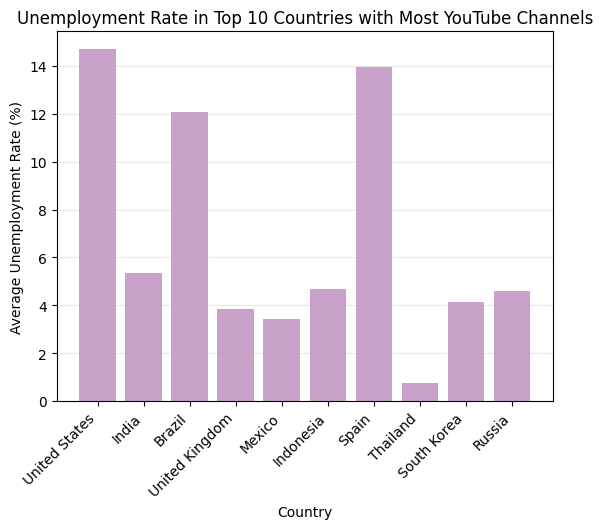

In [16]:
#12. How does the unemployment rate vary among the top 10 countries with the highest number of YouTube channels?
top10_countries = df['country'].value_counts().head(10)
print("Top 10 countries with highest number of YouTube channels:\n", top10_countries)
unemployment_rate = df.groupby('country')['unemployment_rate'].mean()
unemployment_top10 = unemployment_rate.loc[top10_countries.index]
print("\nUnemployment rate for top 10 countries:\n", unemployment_top10)

plt.bar(unemployment_top10.index, unemployment_top10.values, color='#C8A2C8')
plt.title('Unemployment Rate in Top 10 Countries with Most YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.show()


In [17]:
#13. What is the average urban population percentage in countries with YouTube channels?
avg_urb_pop_all = df["urban_population"].mean()
print("Average urban population percentage across all countries with YouTube channels:", avg_urb_pop_all)

avg_urb_pop_per_country = df.groupby('country')['urban_population'].mean()
print("\nAverage urban population percentage per country with YouTube channels:\n", avg_urb_pop_per_country)


Average urban population percentage across all countries with YouTube channels: 223974718.82045454

Average urban population percentage per country with YouTube channels:
 country
Afghanistan               9797273.0
Andorra                         NaN
Argentina                41339571.0
Australia                21844756.0
Bangladesh               60987417.0
Barbados                    89431.0
Brazil                  183241641.0
Canada                   30628482.0
Chile                    16610135.0
China                   842933962.0
Colombia                 40827302.0
Cuba                      8739135.0
Ecuador                  11116711.0
Egypt                    42895824.0
El Salvador               4694702.0
Finland                   4716888.0
France                   54123364.0
Germany                  64324835.0
India                   471031528.0
Indonesia               151509724.0
Iraq                     27783368.0
Italy                    42651966.0
Japan                   1157

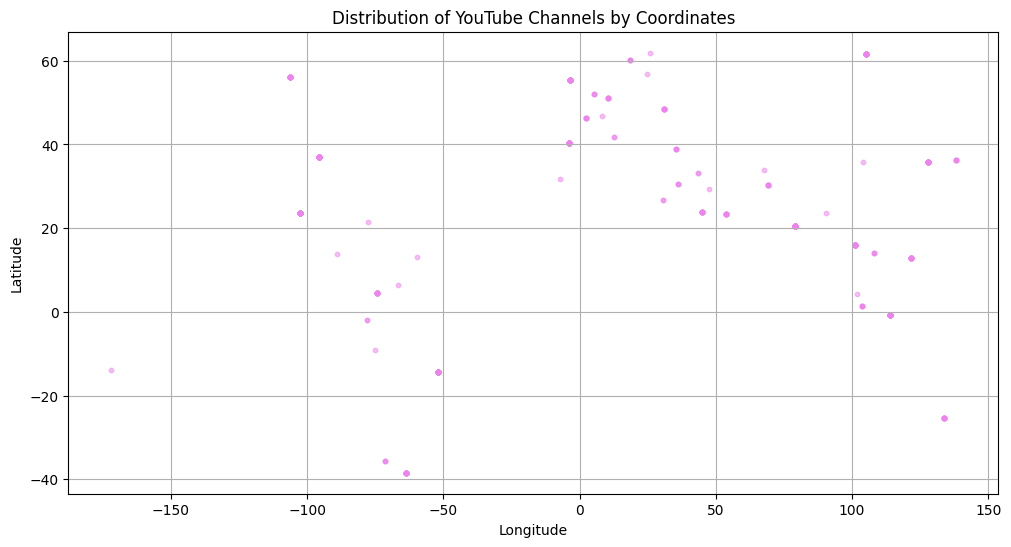

In [18]:
#14. Are there any patterns in the distribution of YouTube channels based on latitude and longitude coordinates?
country_cords = df.groupby('country')[['latitude', 'longitude']].mean().sort_values(by=['latitude', 'longitude'], ascending=False)
import seaborn as sns

plt.figure(figsize=(12,6))
plt.scatter(df['longitude'], df['latitude'], color='violet', alpha=0.5, s=10)  # lilac-like color
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribution of YouTube Channels by Coordinates')
plt.grid()
plt.show()



Correlation between subscribers and population: 0.340759532520351


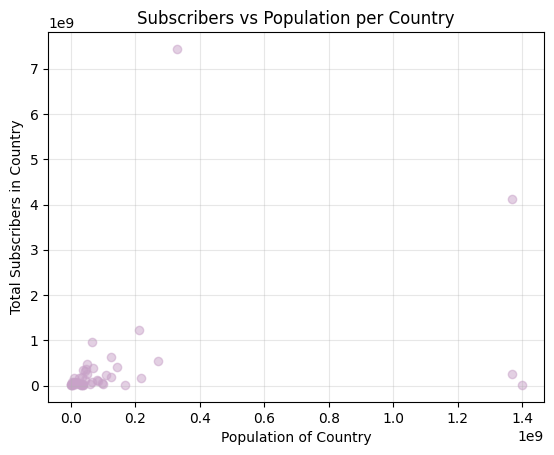

In [19]:
#15. What is the correlation between the number of subscribers and the population of a country?
subscribers_per_country = df.groupby("country")["subscribers"].sum()
population_per_country = df.groupby("country")["population"].first()
num_sub = pd.DataFrame({
    "subscribers": subscribers_per_country,
    "population": population_per_country
})

correlation = num_sub["subscribers"].corr(num_sub["population"])
print("Correlation between subscribers and population:", correlation)

plt.scatter(num_sub["population"], num_sub["subscribers"], color='#C8A2C8', alpha =0.5)
plt.xlabel("Population of Country")
plt.ylabel("Total Subscribers in Country")
plt.title("Subscribers vs Population per Country")
plt.grid(alpha=0.3)
plt.show()


top 10 countries with the highest number of YouTube channels and their their total population                 Number of Channels  Total Population
country                                             
United States                  315      1.033954e+11
India                          169      2.309246e+11
Brazil                          62      1.317868e+10
United Kingdom                  44      2.940714e+09
Mexico                          33      4.158463e+09
Indonesia                       28      7.565710e+09
Spain                           22      1.035689e+09
Thailand                        18      1.253260e+09
South Korea                     17      8.790547e+08
Russia                          16      2.309977e+09


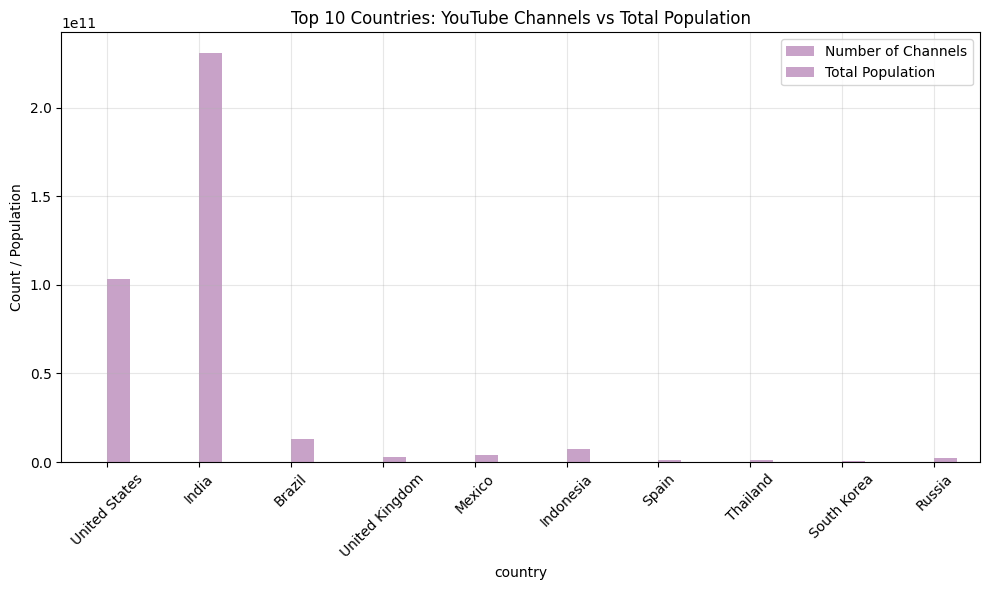

In [20]:
#16. How do the top 10 countries with the highest number of YouTube channels compare in terms of their total population
top_10_countries = df['country'].value_counts().head(10)
top_10_population = df.groupby('country')['population'].sum().loc[top_10_countries.index]
top_10_summary = pd.DataFrame({
    'Number of Channels': top_10_countries,
    'Total Population': top_10_population
})
print("top 10 countries with the highest number of YouTube channels and their their total population", top_10_summary)

top_10_summary.plot(kind='bar', figsize=(10,6), color=['#C8A2C8'])
plt.ylabel("Count / Population")
plt.title("Top 10 Countries: YouTube Channels vs Total Population")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


number of subscribers gained in the last 30 days and the unemployment rate in a country:                       subscribers_for_last_30_days  unemployment_rate
country                                                              
india                                 2.000000e+06               5.36
Sweden                                1.550000e+06               6.48
Kuwait                                1.300000e+06               2.18
Latvia                                1.200000e+06               6.52
Italy                                 1.050000e+06               9.89
Turkey                                8.000000e+05              13.49
South Korea                           7.888889e+05               4.15
Japan                                 7.000022e+05               2.29
United Arab Emirates                  6.625000e+05               2.35
Indonesia                             6.200001e+05               4.69
Colombia                              5.222222e+05               9.71
P

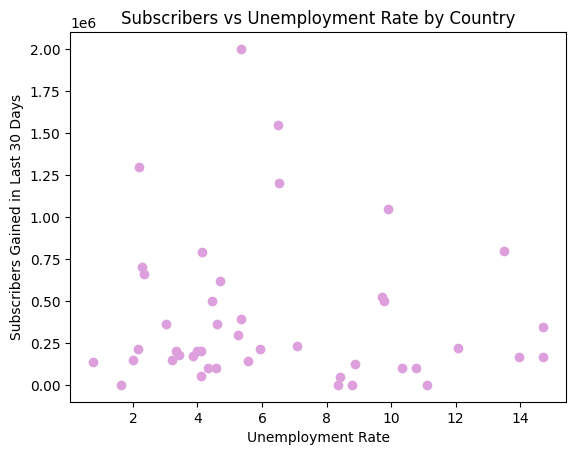

In [21]:
#17. Is there a correlation between the number of subscribers gained in the last 30 days and the unemployment rate in a country?
sub_unemp = df.groupby('country')[['subscribers_for_last_30_days', 'unemployment_rate']].mean().sort_values(by=['subscribers_for_last_30_days', 'unemployment_rate'], ascending=False)
print("number of subscribers gained in the last 30 days and the unemployment rate in a country:", sub_unemp)

plt.scatter(sub_unemp['unemployment_rate'], sub_unemp['subscribers_for_last_30_days'], color='plum')
plt.xlabel('Unemployment Rate')
plt.ylabel('Subscribers Gained in Last 30 Days')
plt.title('Subscribers vs Unemployment Rate by Country')
plt.show()

Distribution of video views for the last 30 days vary across different channel types:
 channel_type
Animals          7.073477e+08
Entertainment    2.128728e+08
Sports           2.030792e+08
Education        2.007373e+08
Comedy           1.923643e+08
News             1.810388e+08
People           1.792531e+08
Music            1.788401e+08
Autos            1.766301e+08
Film             1.405741e+08
Games            1.044434e+08
Nonprofit        9.759050e+07
Howto            5.865822e+07
Tech             5.508947e+07
Name: video_views_for_the_last_30_days, dtype: float64
Correlation between subscribers gained in 30 days and unemployment rate: -0.06294613050037096


<Figure size 1200x600 with 0 Axes>

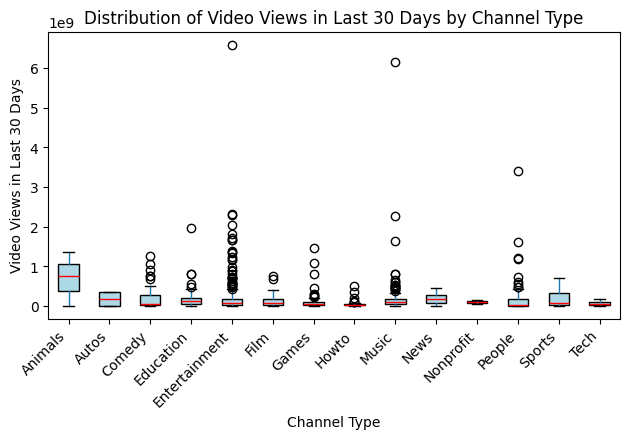

In [22]:
#18. How does the distribution of video views for the last 30 days vary across different channel types?
video_view_dist = df.groupby('channel_type')['video_views_for_the_last_30_days'].mean().sort_values(ascending=False)
print("Distribution of video views for the last 30 days vary across different channel types:\n", video_view_dist)
correlation = sub_unemp['subscribers_for_last_30_days'].corr(sub_unemp['unemployment_rate'])
print("Correlation between subscribers gained in 30 days and unemployment rate:", correlation)

plt.figure(figsize=(12,6))
df.boxplot(column='video_views_for_the_last_30_days', by='channel_type', grid=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))

plt.title('Distribution of Video Views in Last 30 Days by Channel Type')
plt.suptitle('')
plt.xlabel('Channel Type')
plt.ylabel('Video Views in Last 30 Days')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Seasonal trends (sorted by uploads):
 created_month
Oct    16688.500000
Aug    15912.265060
Jun    13059.413333
Sep    12182.113402
Feb    11732.582090
Nov     8841.582418
May     8568.717647
Jan     8012.594059
Jul     5603.808989
Mar     4339.232558
Dec     3577.154930
Apr     2499.929577
Name: uploads, dtype: float64


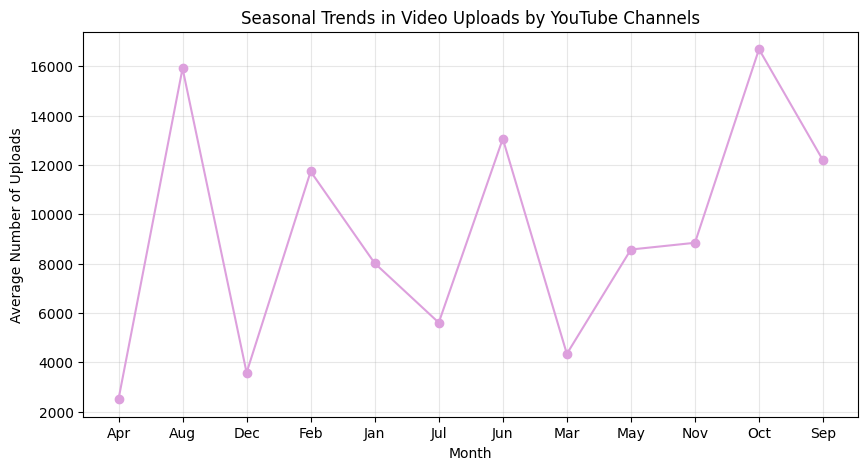

In [23]:
#19. Are there any seasonal trends in the number of videos uploaded by YouTube channels?

video_upload_trend = df.groupby('created_month')['uploads'].mean()
video_upload_trend = video_upload_trend.sort_index()

video_upload_trend_sorted = video_upload_trend.sort_values(ascending=False)
print("\nSeasonal trends (sorted by uploads):\n", video_upload_trend_sorted)

plt.figure(figsize=(10,5))
plt.plot(video_upload_trend.index, video_upload_trend.values, marker='o', color='plum')
plt.xlabel('Month')
plt.ylabel('Average Number of Uploads')
plt.title('Seasonal Trends in Video Uploads by YouTube Channels')
plt.grid(alpha=0.3)
plt.show()

Average number of subscribers gained per month since channel creation: 168118.48635526528


/tmp/ipython-input-3608704560.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


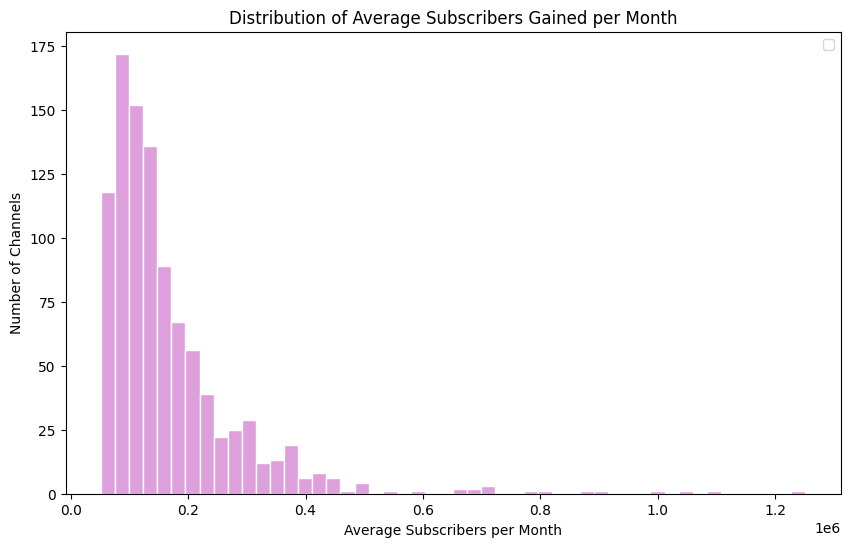

In [24]:
#20
import pandas as pd
import matplotlib.pyplot as plt

df['created_year'] = df['created_year'].astype(str).str.replace('.0', '', regex=False)
df['created_year'] = pd.to_numeric(df['created_year'], errors='coerce').astype('Int64')

df['created_month'] = df['created_month'].astype(str)
df['created_month'] = df['created_month'].replace(['nan', 'NaN', 'NAN'], pd.NA)

df['created_datetime'] = pd.to_datetime(
    df['created_year'].astype(str) + " " + df['created_month'].astype(str) + " 1",
    format='%Y %b %d',
    errors='coerce'
)

today = pd.Timestamp.today()
df['months_since_creation'] = ((today.year - df['created_datetime'].dt.year) * 12 +
                               (today.month - df['created_datetime'].dt.month))

df['months_since_creation'] = df['months_since_creation'].replace(0, 1)

df['avg_subs_per_month'] = df['subscribers'] / df['months_since_creation']

overall_avg = df['avg_subs_per_month'].mean(skipna=True)
print("Average number of subscribers gained per month since channel creation:", overall_avg)

plt.figure(figsize=(10,6))
plt.hist(df['avg_subs_per_month'].dropna(), bins=50, color='plum', edgecolor='white')
plt.title("Distribution of Average Subscribers Gained per Month")
plt.xlabel("Average Subscribers per Month")
plt.ylabel("Number of Channels")
plt.legend()
plt.show()
